**Computation of E. Coli’s localization within bacterial genome,
where its DNA replication process begins.**

When it comes to analysis of genetic code, using computational methods to illustrate replication, transcription or translation, seems like a rather trivial problem. Since molecular mechanisms responsible for these processes are well known and described. It's sufficient to program well the appropriate change in nucleotides (transcription) or translation from codons to proteins. Situation becomes more complicated, when one desires to perform a more sophisticated analysis of DNA. This requires more sorrow knowledge of molecular biology's mechanisms as well as applying and programming more complex algorithms. Nonetheless, it gives an immense satisfaction and leads to obtaining gratifying results. That is why, the purpose of this work is to discover the hidden messages that DNA code holds. In case of this project, these would be different bacteria species, as their genom is well-knowned. Hence, the computational results can be confronted with those obtained in the laboratory and accurate conclusions could be drawn from such comparison.
DNA replication is one of the most important jobs done in our cells. Before every cell divide, it must first duplicate its DNA, so that every of the newly formed cell would have the appropriate genetic material. Replication mechanism is very well known, DNA divides itself into two strands, each single-strand acts as a template for a newly form double-stranded DNA. As a result, replication process starts with a pair of complementary strands of DNA and finishes of with two pairs of complementary strands.

Replication process starts in precisely defined place, called ORI. It is performed by DNA polimerases. Localizing ORI plays an important role, not only to understand the replication process but also to figure out many biomedical problems. It results from the fact, that at a basis on any gene therapy, there is knowing the place where replication process starts within the genome, so that it could be infected with virus vector (containing the artificial gene, coding the missing protein). These kinds of therapy are the ground for personal medicine, which itself is thought to be the future of medicine.


When formulating this computational problem, one has to make an assumption that ORI is represented as a part of DNA strand- sequence of nucleotides, belonging to four letter alphabet {A,C,G,T}- adenine, cytosine, guanine, thymine. It's a character string, consisted of these 4 letters alphabet. What makes these letters being specifically arranged and how to tackle this problem starting completely from zero? We have to rely on the reports from laboratory/literature and use already known bacterial ORI. Vibrio cholerae is an example of such bacteria. Sequence of nucleotides occuring in ORI of this bacteria looks as follows:

atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc

How does a cell know to start the replication process exactly in this short region of DNA, which is a part of genome containing half a milion of nucleotides? It's known, from molecular biology theory, that DnaA- protein drives the start of replication process. It binds to a short region in ORI called DnaA box. The task for now is to find this exact place in DNA. In order to do that, we can count the patterns, that exist particularly often in a given sequence. We treat DNA as a language, and a template, as a specifically often existing word in this language. It is based on theory, as some of the proteins can bind to DNA only if they encounter precise character chain. The more often it occurs, the more possible it is that this kind of binding will take place.

We can write a simple function, counting a given pattern in a sequence (in other words: a word in language)

In [1]:
def PatternCount(Seq, Pattern):
    count = 0
    for i in range(len(Seq)-len(Pattern)+1):
        if Seq[i:i+len(Pattern)] == Pattern:
            count = count+1
    return count 

This function scans a window on the character chain and counts the occurences of a given pattern. It returns exactly how many times particular pattern appeared in a nucleotide sequence.

We say, that a given pattern is the most frequently occuring k-mer (a substring of length k) if the result of above-mentioned function is the largest number in a given character chain. We have clearly defined problem of finding the most frequently occuring pattern in known ORI (mentioned before).

In order to solve this problem, we build a frequency map, which maps the pattern with its frequency of occurence in a string.

In [2]:
def FrequencyMap(Seq, k):
    freq = {}
    n = len(Seq)
    for i in range(n-k+1):
        Pattern = Seq[i:i+k]
        if Pattern not in freq:
            freq[Pattern] = 1
        else:
            freq[Pattern] += 1
    return freq

Having a function which generates a frequency map of occurences of a given substring, we need to find out, which of the patterns reach maximum appearence. Below function returns the most frequently appearing substring in a sequence.

In [3]:
def FrequentWords(Seq, k):
    words = []
    freq = FrequencyMap(Seq, k)
    m = max(freq.values())
    for key in freq:
        if freq[key]==m:
            words.append(key)
    return words

We apply this function to the already known ORI of cholerae bacteria with a sample k value k=9, in order to check it in action.

In [4]:
Seq='atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc'

In [5]:
print(FrequentWords(Seq,9))

['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat']


Using earlier defined function PatternCount, we can determine how many times a given pattern occured.

In [6]:
print(PatternCount(Seq,'atgatcaag'))

3


We see that there are four k-mers, that appeared 3 times each. Laboratory experiments show, that bacterial DnaA boxes have most often a length of  9 nucleotides. What is more, we can suspect that that the fact that such a complex sequence appeared 3 times in such a short character string indicates something relevant. It remains to be decided which one from 4 found patterns is the one we are looking for.

 In order to find out that information, we have to remember also about rule of complementary base pairing. It states that adenine (A) pairs with thymine (T) and guanine (G) pairs with (cytosine). Direction of DNA strand is from 5' end to 3' end. That is how a given string is read, complementary sequences gets created in the opposite direction that the matrice chain.

In that case, we need another function, which reverse the order of a given string and at the same time translates it no a string of complementary nucleotides.
We define two functions:

In [7]:
def Reverse(Pattern):
    new_str=''
    for char in range(-1,-len(Pattern)-1,-1):
        new_str+=Pattern[char]
    return new_str

In [8]:
def Complement(Pattern):
    Pattern=Pattern.upper()
    empty_str=''
    for char in Pattern:
        if char=='A':
            empty_str+='T'
        elif char=='T':
            empty_str+='A'
            
        elif char=='G':
            empty_str+='C'
    
        else:
            empty_str+='G'
    
    return empty_str

and add them together:

In [9]:
def ReverseComplement(Pattern):
    Reversed_Pattern = Reverse(Pattern) 
    Reversed_Complement_Pattern = Complement(Reversed_Pattern)
    return Reversed_Complement_Pattern

Bearing in mind complementary rule, lets look now at the most frequently appearing 9-mers in ORI sequence of cholerae.

In [10]:
print(FrequentWords(Seq,9))

['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat']


Now, using ReverseComplement function, lets check wether there are some reverse, complement substrings.

In [11]:
print(ReverseComplement('atgatcaag'))
print(ReverseComplement('ctcttgatc'))
print(ReverseComplement('tcttgatca'))
print(ReverseComplement('cttgatcat'))

CTTGATCAT
GATCAAGAG
TGATCAAGA
ATGATCAAG


 We see, that the first and last substring is the same sequence. It means that this patters occured 6 (!) times in a given ORI sequence.

atcaatgatcaacgtaagcttctaagc**ATGATCAAG**gtgctcacacagtttatccacaac ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca cggaaag**ATGATCAAG**agaggatgatttcttggccatatcgcaatgaatacttgtgactt gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat tgataatgaatttacatgcttccgcgacgatttacct**CTTGATCAT**cgatccgattgaag atcttcaattgttaattctcttgcctcgactcatagccatgatgagct**CTTGATCAT**gtt tccttaaccctctattttttacggaaga**ATGATCAAG**ctgctgct**CTTGATCAT**cgtttc

It makes no difference for DnaA protein, whether which version of the pattern it is (standard or reverse complement).In that case, 9 letters string repeating 6 times in a sequence of few hundreds letters may give a solid basis to suspect this pattern to be a DnaA box- a place, where replication process begins in DNA.

In order to make sure, that above-mentioned assumptions are correct,lets check if this pattern exists in whole bacteria genome. It would suggest, that found pattern is not correct as it wouldn't be specific for ORI region.

Lets write a function, that finds a position in a genome for a specific pattern (its initial coordinate).

In [12]:
def PatternMatching(Pattern, Genome):
    positions = [] 
    for i in range(len(Genome)-len(Pattern)+1):
        if Genome[i:i+len(Pattern)] == Pattern:
            positions.append(i)
    
    return positions

Lets read in the whole cholerae bacteria genome and check where the afore-mentioned pattern exist in it.

In [13]:
with open('Vibrio_cholerae.txt', 'r') as file:
    v_cholerae = file.read()
                 

positions=PatternMatching('CTTGATCAT',v_cholerae)
print(positions)          


[60039, 98409, 129189, 152283, 152354, 152411, 163207, 197028, 200160, 357976, 376771, 392723, 532935, 600085, 622755, 1065555]


It can be spotted that the three positions: 152283, 152354, 152411 are especially close to each other.

In [14]:
positions=PatternMatching('ATGATCAAG',v_cholerae)
print(positions)  

[116556, 149355, 151913, 152013, 152394, 186189, 194276, 200076, 224527, 307692, 479770, 610980, 653338, 679985, 768828, 878903, 985368]


Similar conclusion can be drawn from the reverse complement k-mer.

Next step is to check, whether the given pattern has an effect in all bacteria species. In order to do this, we will test it with another well known bacterial ORI - Termotoga petrophila.

aactctatacctcctttttgtcgaatttgtgtgatttatagagaaaatcttattaactga
aactaaaatggtaggtttggtggtaggttttgtgtacattttgtagtatctgatttttaa
ttacataccgtatattgtattaaattgacgaacaattgcatggaattgaatatatgcaaa
acaaacctaccaccaaactctgtattgaccattttaggacaacttcagggtggtaggttt
ctgaagctctcatcaatagactattttagtctttacaaacaatattaccgttcagattca
agattctacaacgctgttttaatgggcgttgcagaaaacttaccacctaaaatccagtat
ccaagccgatttcagagaaacctaccacttacctaccacttacctaccacccgggtggta
agttgcagacattattaaaaacctcatcagaagcttgttcaaaaatttcaatactcgaaa
cctaccacctgcgtcccctattatttactactactaataatagcagtataattgatctga

In [15]:
 Seq='AACTCTATACCTCCTTTTTGTCGAATTTGTGTGATTTATAGAGAAAATCTTATTAACTGAAACTAAAATGGTAGGTTTGGTGGTAGGTTTTGTGTACATTTTGTAGTATCTGATTTTTAATTACATACCGTATATTGTATTAAATTGACGAACAATTGCATGGAATTGAATATATGCAAAACAAACCTACCACCAAACTCTGTATTGACCATTTTAGGACAACTTCAGGGTGGTAGGTTTCTGAAGCTCTCATCAATAGACTATTTTAGTCTTTACAAACAATATTACCGTTCAGATTCAAGATTCTACAACGCTGTTTTAATGGGCGTTGCAGAAAACTTACCACCTAAAATCCAGTATCCAAGCCGATTTCAGAGAAACCTACCACTTACCTACCACTTACCTACCACCCGGGTGGTAAGTTGCAGACATTATTAAAAACCTCATCAGAAGCTTGTTCAAAAATTTCAATACTCGAAACCTACCACCTGCGTCCCCTATTATTTACTACTACTAATAATAGCAGTATAATTGATCTGA'

In [16]:
count_1=PatternCount(Seq,'ATGATCAAG')
count_2=PatternCount(Seq, 'CTTGATCAT')
print(count_1+count_2)

0


It turns out, that the returned number of occurances of this particular pattern in a whole sequence is 0. Hence, this approach does not generalize well if we would like to find an unknown ORI in a newly sequenced genome. Lets change the approach, this time instead of finding the aggregation of the most frequently appearing k-mer, we will look for every k-mer that forms any kind of aggregation. We will slide a window of a fixed length along the whole genome, looking for the place, where k-mer occurs few times in short intervals. We can assume the length of a sliding window L=500, as it fits well with laboratory discovered bacterial ORI. Following this logic, in our last steps, pattern ATGATCAAG formulated (500,3)- aggregation in Vibrio cholerae. In order to perform futher analysis, it's needed to dig deeper into the replication rpcess in bacterial genome.

In contrast to human, bacterial chromosome has a circular shape. ORI is on the one side of this circle, on the other side of the circle more or less opposite to ORI, TER is located (replication terminus). In the process of unfolding of the strands close to ORI region- replication forks are being formed. DNA polymerase does not wait until two strands are completely separated. It starts copying DNA while this process is taking place.In order for polymerase to start the replication process, it needs primers. These are the short complimentary DNA fragments, which bind to the original DNA. This way, all of the four DNA polymerases start replication process by adding complementary nucleotides, starting in primer place, moving around the circle chromosome from ORI to TER (clockwise and counterclockwise). Unfortunately, in practice replciation process is more complicated. It arises from the fact, that DNA polymerase works only in a one direction (3'->5'). Unidirectionality of polymerase requires revising our assumptions. We need to take into account, that we are dealing with 4 semi-strands. Two of them are traversing DNA in the direction 5'->3' and are called lagging strands.Another two are taking 3' -> 5' direction, these are called forward strands. It is crucial to understand, that replication process is assymetrical- it differs for lagging and forward strands. The process for lagging strand is more complex. It requires special segments- Okazaki fragments and takes more time to finish as the name implies.

It may seems like the complexity of the replication process could complicate the task of finding the ORI. However, this introduces an additional- known aspect, that can faciliate the process afterall. Forward strand exists as a double helix for the majority of its life and lagging strand as a single one. This discrepancy is very important because it leads to the next link- single DNA strands have a higher affinity for existance of mutations than double stranded DNA. In that case, we should observe a shortage of nucleotide, which has a higher tendency to mutate in a single strand.

Literature reports for an earlier mentioned bacteria- Thermoga petrophilia shows, that cytosine occurs more frequently on a forward strand. Its complementary base (guanine) appears less frequently on the same strand. It turns out, that these discrepancy is observed because cytosine has a tendency of mutating to thymine, under a process known as deamination. The result of it is less cytosine content on a lagging strand. Lets see, if we can use this peculiar statistics in order to find ORI in a circular chromosome of this bacteria. This time, we will be moving a window of a genome length divided by two, counting all of the occurances of cytosine in it. The least cytosine content will fall into the lagging strand and the window containing the vast amount of this nucleotide will correspond to the forward strand of this genom. Then, if we distinguish the two strands- we will be at the ORI place. We should include the circularity of the genome in our computations and add half of its length at the end of it- not to miss any significant results. We will track the occurances of cytosine with a symbol array. I-th element of the array will correspond to the amount of the occurances of a given symbol in a window of half of a genom length, at the i-th position of the extended genome (containing the part that takes into account its circularity).

Lets define a function, that creates the symbol array. It will be using the function of counting the pattern which was previously created.

In [17]:
def SymbolArray(Genome, symbol):
    array = {}
    n = len(Genome)
    ExtendedGenome = Genome + Genome[0:n//2]
    for i in range(n):
        array[i] = PatternCount(symbol, ExtendedGenome[i:i+(n//2)])
    return array

Despite the fact, that this algorithm has a correct rule of operation, it is not efficient. Considering the E.Coli genome, containing 4.5 millions of nucleotides, it has to perform too many operations and comparisons in order to generate the symbol array (assymptotic growth rate).

In order to make it faster, it's enough to notice, that the occurance of the symbol doesn't change a lot with shifting the window to the right. Generating the whole array is not efficient. Lets create a more efficient algorithm, taking into account two symbols every time a search window shifts.

In [18]:
def FasterSymbolArray(Genome, symbol):
    array = {}
    n = len(Genome)
    ExtendedGenome = Genome + Genome[0:n//2]

    # look at a first half of a genome to count the first value of the array
    array[0] = PatternCount(symbol, Genome[0:n//2])

    for i in range(1, n):
        # set a current value of the array equal to its previous value
        array[i] = array[i-1]

        # current value of the array can differ from the previous one at most 1
        if ExtendedGenome[i-1] == symbol:
            array[i] = array[i]-1
        if ExtendedGenome[i+(n//2)-1] == symbol:
            array[i] = array[i]+1
    return array

Lets look at the visualization of this funcion.

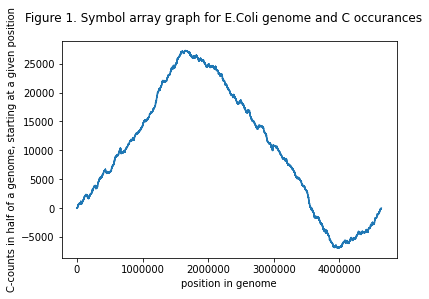

In [19]:
with open('E_coli.txt') as file:
    e_coli = file.read();

array = FasterSymbolArray(e_coli, "C")

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(*zip(*sorted(array.items())))
plt.ticklabel_format(useOffset=False, style='plain')
plt.suptitle('Figure 1. Symbol array graph for E.Coli genome and C occurances')
plt.xlabel('position in genome')
plt.ylabel('C-counts in half of a genome, starting at a given position')
plt.show()

Considering the above figure, a following conclusions can be made; maximum amount of cytosine in the E.Coli genom falls in position ~1600000 and its minimum amount can be found at position 4000000. It implies that forward strand starts at a position 1600000 and lagging strand starts at 4000000. We know, that ORI is located where forward strand turns into a lagging one, we can state, that ORI of E.Coli bacteria is located somewhere near position 4000000 in a genome.

In practice, other more precise algorithm is used in order to find ORI. It is based on the differences of counts of guanine and cytosine on forward and lagging strands. We are making an assumptions, that if the difference in the amount of guanine and cytosine (#G-#C) is growing, it means that we are on the lagging strand. If this difference is reducing; we are on the forward strand. It arises from before-mentioned deamination process-  a cytosine tendency to mutate into thymine on a single strand (lagging).

We will be now following the difference (#G-#C), that we observed until now in a genome, using the skew array. This array will include the difference in the amount of occurances of guanine and cytosine at the i-th position.

In [20]:
def SkewArray(Genome):
    Skew={}
    Skew[0]=0
    
    for i in range(len(Genome)):
        if Genome[i]=='A' or Genome[i]=='T':
            Skew[i+1]=Skew[i]
        elif Genome[i]=='G':
            Skew[i+1]=Skew[i]+1
        elif Genome[i]=='C':
            Skew[i+1]=Skew[i]-1
    return Skew.values()

Lets visualize this skew array for E.Coli genome.

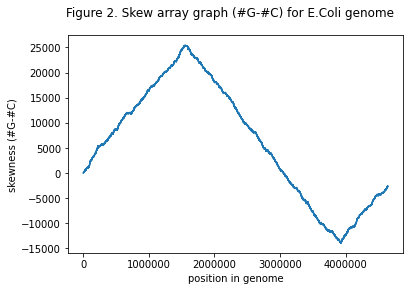

In [21]:
with open('E_coli.txt') as file:
    e_coli = file.read();

skewarray= SkewArray(e_coli)
skewarray_lst=list(skewarray)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(skewarray_lst)
plt.ticklabel_format(useOffset=False, style='plain')
plt.suptitle('Figure 2. Skew array graph (#G-#C) for E.Coli genome')
plt.xlabel('position in genome')
plt.ylabel('skewness (#G-#C)')
plt.show()

Figure 2 shows even more sharp view of the differences of occurences of different nucleotides than in case of Symbol Array (Figure 1).

We can now compute the position in E.Coli genome, for which the difference (#G-#C) is the biggest.

In [22]:
skewarray_lst.index(max(skewarray_lst))

1550413

We see, that it falls into 1550413 position in a genome.

Lets compute the position at which there is a minimal difference between guanin and cytosin occurances.

In [23]:
skewarray_lst.index(min(skewarray_lst))

3923620

Minimum value of (#G-#C) difference can be found at position 3923620 in E.Coli genome.

Moving along the forward strand in a bacterial chromosome from ORI to TER, it can be noticed that #G-#C difference is reducing. It grows moving along the lagging strand. Skewness reaches its minimal value where the forward strand turns into the lagging one and it is exactly where ORI is located.

Lets write the universal funcion which will return the position where the difference of #G-#C is minimal.

In [25]:
def MinimumSkew(Genome):
    positions=[]
    Sarray=SkewArray(Genome)
    Sarray_lst=list(Sarray)
    # find minimum values
    min_val = min(Sarray)
    # check the whole genome, if there are no less values
    for i in range(len(Sarray_lst)):
        if Sarray_lst[i]==min_val:
            positions.append(i)
    
    return positions

Now we're checking if it gives the expected result.

In [26]:
with open('E_coli.txt') as file:
    e_coli = file.read();

positions1= MinimumSkew(e_coli)
print(positions1)

[3923620, 3923621, 3923622, 3923623]


Lets display the 500 nucleotides, starting at a position where #G-#C is the smallest.

In [27]:
e_coli_ORI=e_coli[3923620:3924120]
print(e_coli_ORI)

AATGATGATGACGTCAAAAGGATCCGGATAAAACATGGTGATTGCCTCGCATAACGCGGTATGAAAATGGATTGAAGCCCGGGCCGTGGATTCTACTCAACTTTGTCGGCTTGAGAAAGACCTGGGATCCTGGGTATTAAAAAGAAGATCTATTTATTTAGAGATCTGTTCTATTGTGATCTCTTATTAGGATCGCACTGCCCTGTGGATAACAAGGATCCGGCTTTTAAGATCAACAACCTGGAAAGGATCATTAACTGTGAATGATCGGTGATCCTGGACCGTATAAGCTGGGATCAGAATGAGGGGTTATACACAACTCAAAAACTGAACAACAGTTGTTCTTTGGATAACTACCGGTTGATCCAAGCTTCCTGACAGAGTTATCCACAGTAGATCGCACGATCTGTATACTTATTTGAGTAAATTAACCCACGATCCCAGCCATTCTTCTGCCGGATCTTCCGGAATGTCGTGATCAAGAATGTTGATCTTCAGTG


Now, checking what is the most frequent pattern in this region, using the before-defined function:

In [28]:
FrequentWords(e_coli_ORI,9)

['AAGGATCCG', 'AGGATCCGG']

and the number of times it occurs:

In [29]:
PatternCount(e_coli_ORI, 'AAGGATCCG')

2

In [30]:
PatternCount(e_coli_ORI, 'AGGATCCGG')

2

None of the patterns exists 3 or more times. It seems like we still haven't found DnaA box of E.Coli bacteria. However, DnaA is capable of binding to not perfect DnaA box. Meaning, that its slight modifications also plays its role. 

Lets define a new function which will calculate the so-called Hamming distance- the number of mismatches of two character strings.

In [31]:
def HammingDistance(p, q):
    count=0
    for i in range(len(p)):
        if p[i]!=q[i]:
            count+=1
                
    return count

A given pattern occurs as a substring with d number of mismatches, if there is a k-mer that meets the following objectives: has d or less of mismatches. Lets define another function, that assumes, that we are allowing for certain amount of mismatches in nucleotides of a gives sequence.

In [32]:
def ApproximatePatternMatching(Text, Pattern, d):
    positions = [] 
    for i in range(len(Text)-len(Pattern)+1):
        if HammingDistance( Text[i:i+len(Pattern)], Pattern) <= d:
                positions.append(i)
    
    return positions

Lets now modify the function, that counts the patterns, so that it takes into account the amount of the mismatches of a given character string.

In [33]:
def ApproximatePatternCount(Text, Pattern, d):
    count = 0 
    for i in range(len(Text)-len(Pattern)+1):
        if HammingDistance( Text[i:i+len(Pattern)], Pattern) <= d:
            count+=1
    return count

Next step is to calculate the most frequent patterns in ORI region,allowing a point mismatch. In order to do that, first lets create the list of all 9-mers in ORI region.

In [34]:
def KmerArray(ori,k):
    kmerArray=[]
    for i in range(len(ori)-k+1):
        kmerstring=ori[i:i+k]
        kmerArray.append(kmerstring)
    return kmerArray

Then, lets define a function, that takes the ORI region as an input (read from Skew Diagram), length of a pattern and a number of nucleotides mismatches allowed. As an output, we will get a maximum value of counts of a particular pattern with a sequence, for which it occurs.


In [35]:
def ApproximatePatternCountOri(ori,k,d):
    KmerDict={}
    PatternArray=KmerArray(ori,k)
    for i in range(len(PatternArray)):
        kmer=PatternArray[i]
        kmerReverseComplement=ReverseComplement(kmer)
        countkmer=ApproximatePatternCount(ori, kmer, d)
        countkmerReverseComplement=ApproximatePatternCount(ori, kmerReverseComplement, d)
        countkmersum=countkmer+countkmerReverseComplement
        KmerDict[kmer]=countkmersum
        
    
    finalsolution=[0]
    while KmerDict:
        key, value = KmerDict.popitem()
        if value > finalsolution[0]:
             finalsolution= [value,[key]]
        elif value == finalsolution[0]:
            finalsolution[1].append(key)

    return finalsolution
    return finalsolution

Putting it all together now. Lets apply this function to the ORI region in E.Coli genome, that we set before. We take k as 9, d=1- allowing only one mismatch.

In [36]:
final_result=ApproximatePatternCountOri(e_coli_ORI,9,1)
print(final_result)

[4, ['GATCCCAGC', 'TTATCCACA', 'GTTATCCAC', 'CTGGGATCA', 'GCTGGGATC', 'AGCTGGGAT', 'GTGGATAAC', 'TGTGGATAA', 'GGATCCTGG']]


We got the final result- maximum count of the most frequent pattern is 4 and its represented by 9 patterns. It can be easily spotted, that there are also complementary strings.

Finally, lets check how many unique patterns are there in the final result.

In [37]:
def unique(patterns):
    unique=[]
    for pattern in patterns:
        if pattern and ReverseComplement(pattern) not in unique:
            unique.append(pattern)
    return unique

In [38]:
unique(final_result[1])

['GATCCCAGC', 'TTATCCACA', 'GTTATCCAC', 'CTGGGATCA', 'AGCTGGGAT', 'GGATCCTGG']

It turns out, that there are 6 of them and among them, there is experimentally confirmed DnaA box of bacteria E.Coli: **TTATCCACA**.

We have managed to narrow down the search field from 4.5 millions of nucleotides {A,C,T,G} to six finally chosen 9-mers. Creation of such bioinformatics algorithms will always require consultation of the results with molecular biologists or other scientists. However, computational methods in biology/genomics make up a solid support in discovering new dependencies in genetics. What is more, we can assume, that the rest of the frequently occuring sequences of nucleotides also play an important role in a genome. As it is a generally known fact, that sequences having some particular function in a DNA are very often observed in such aggregations. What roles it play, could be a basis of a consecutive analysis like the one already performed (i.e motif search).

Literature: <br>
[1] Molecular Cell Biology 5th ed - Lodish et al. <br>
[2] Bioinformatics Algorithms: An Active Learning Approach - Pavel A. Pevzner, Phillip Compeau
    